#     <span style='font-family:Georgia' > Sentiment Analysis on Udemy_online_course_app_review </span>

<div class="alert alert-info">
Author: Veerasuganthi V<br>
Last Modified: 2022/12/5<br>
Version: V5.0<br>
Email_Id: veerasuganthi.ece@gmail.com<br>
</div>

# <span style='color:Purple'>Why sentiment analysis?!</span>

##### <span style='color:black'> A review on anything(product, movie, person, etc.) is very important these days to get a clear picture of what the end-users think. An enthusiast gives all kinds of reviews on a particular domain or a consumer who has a bad experience provides negative reviews on the product they purchased/used. It’s us who gave “The Shawshank Redemption” a rating of 9.3 and “Student of the Year 2” has a rating of 2.2 on IMDB. Talking about any product’s feedback, We have plenty of user review data if we want to take a look at this particular topic. The sources can be shopping portals like Amazon, Flipkart, Alibaba, Myntra, etc. as well as social media platforms like Twitter, Facebook,etc</span>

# <img src='https://www.rhythmsystems.com/hs-fs/hubfs/iStock-1028038004.jpg?width=450&name=iStock-1028038004.jpg'/>

#### Sentiment analysis can be done with or without building a machine learning model. This  will go over the Python implementation of TextBlob, VADER, and Flair for both   model and non-model sentiment analysis.

# <div class="alert alert-info">Sentiment Analysis with TextBlob, VADER, and Flair machine Learning model</div> 

# <div class="alert alert-success">Data Scrapping</div> 

In [1]:
#scrappping udamy app review data from googly play
!pip install -q google_play_scraper 
from google_play_scraper  import app , Sort , reviews_all
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
print ("All the required modules are imported successfully")

All the required modules are imported successfully


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('ggplot')
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('vader_lexicon')
nltk.download('words')
print ("All the required modules are imported successfully for vaders and boxplot pretrained")

All the required modules are imported successfully for vaders and boxplot pretrained


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Veerasuganthi\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Veerasuganthi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Veerasuganthi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
#Data visualization
!pip install -q plotly  

In [4]:
udemy_project =reviews_all('com.udemy.android',sleep_milliseconds=0,lang='en',country='us',sort=Sort.NEWEST)

In [8]:
#Scraped all the udemy reviews from  playstore 
# Python program to demonstrate
# string slicing

String = udemy_project
# Using indexing sequence
print(String[:2])

[{'reviewId': 'cc2357ea-f1cd-48ce-815f-f7eda6b900b3', 'userName': 'MD SHAH IMROZ (MASTER IMROZ)', 'userImage': 'https://play-lh.googleusercontent.com/a-/AD5-WCkRHjKLIRxrVGWvFCO0TJGtdMOJlDRZPeml5G8B', 'content': 'Very Good', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': None, 'at': datetime.datetime(2022, 12, 11, 21, 10, 28), 'replyContent': None, 'repliedAt': None}, {'reviewId': 'fe0f9ae2-f290-4dcd-b603-e7eea62cace9', 'userName': 'Shankri Subramaniam', 'userImage': 'https://play-lh.googleusercontent.com/a-/AD5-WCnvmsNbEbnO9fm2mcRTVrIuXq0pzc_ox0m5BGJXpQ', 'content': 'Absolutely rubbish & fraudulent. I wanted to buy a course through the app. I did that and the payment was also successful. I did receive an email confirmation. Soon after that when I checked, I could find the course under My learning. I switched between the options to check out for other courses and then came back to My learning where the course was not there anymore. I sent multiple emails to the udemy mail id bu

In [9]:
def googleplaystore_scraper(link,milli,lang_code,country_code):
    """
    Function will scrap the reviews from the google playstore for the provided link and return the dataframe
    
    Arg:
    link - provide the google playstore link eg:com.nianticlabs.pokemongo
    milli - sleep_milliseconds default to '0'
    lang_code - lang eg: 'en'
    country_code - country eg: 'us' 
    
    Return: 
    Dateframe - Dataframe with following features(reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt)
    """
    reviews = reviews_all(link,sleep_milliseconds=milli,lang=lang_code,country=country_code,sort=Sort.NEWEST)
    df = pd.DataFrame(np.array(reviews),columns=['content'])
    df = df.join(pd.DataFrame(df.pop('content').tolist()))
    return df 

In [10]:
%%time
df = googleplaystore_scraper('com.recentapps.activities',0,'en','us') #com.google.android.apps.nbu.paisa.user

CPU times: total: 0 ns
Wall time: 397 ms


In [11]:
reviews_df=pd.DataFrame(udemy_project)

# <div class="alert alert-success">Data Munging/Data Wrangling (aka Data Manipulation)</div> 

In [12]:
reviews_df=reviews_df.head(90000)

In [13]:
#Data Backup
df1 = reviews_df.copy()

In [14]:
reviews_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

In [15]:
#removing unwanted data columns
reviews_df=reviews_df.drop(['reviewId','userName','userImage','thumbsUpCount','reviewCreatedVersion','at','replyContent','repliedAt'],axis=1)

In [16]:
reviews_df.shape

(72406, 2)

In [17]:
reviews_df.to_csv('Udemy_review_Dataset.csv',index=False)       #Exporting CSV file from the dataframe

In [18]:
#To read csv file
Udemy = pd.read_csv(r'Udemy_review_Dataset.csv',low_memory=False) 
#If you add index=False, then index row will not appear in your csv file

In [19]:
# Data info:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72406 entries, 0 to 72405
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  72288 non-null  object
 1   score    72406 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [20]:
reviews_df.describe()

,score
count,72406.000000
mean,3.993191
std,1.496702
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [21]:
type(reviews_df)                                            #datatype 

pandas.core.frame.DataFrame

In [22]:
reviews_df.size

144812

In [23]:
reviews_df.columns                                       #List the num of columns in the dataset

Index(['content', 'score'], dtype='object')

In [24]:
reviews_df.columns.value_counts().sum()                  # num of columns in the dataset

2

In [25]:
reviews_df['content'].value_counts().sum()                 #sum of content counts

72288

In [26]:
reviews_df['score'].value_counts().sum()                   #sum of score counts

72406

## <div class="alert alert-success">Handling NaN values</div>     

In [27]:
reviews_df.isnull().sum().sum()                               #To check how many total NaN values in the entire dataframe

118

In [28]:
reviews_df.isnull().sum()                                     #To check the NaN values across each features

content    118
score        0
dtype: int64

In [29]:
reviews_df=reviews_df.dropna(axis=0, how="any", thresh=None, subset='content', inplace=False)  #drop na values in content column

In [30]:
reviews_df.isnull().sum()

content    0
score      0
dtype: int64

In [31]:
reviews_df1=reviews_df

# <div class="alert alert-success">Basic NLTK </div>   

In [32]:
#Doing basic NLTK  to understand tokkenizing 
example=reviews_df['content'][0]
print(example)

Very Good


In [33]:
tokens=nltk.word_tokenize(example)    #Tokenization
tokens[:10]                            # taking first 10 single in the sentence

['Very', 'Good']

In [34]:
tagged=nltk.pos_tag(tokens)           #Returns an list of tuples of the form (word, POS tag).
tagged[:10]

[('Very', 'RB'), ('Good', 'JJ')]

In [35]:
entities = nltk.chunk.ne_chunk(tagged)                          #chunk into a sentence 
entities.pprint()                                                #pprint---pretty print

(S Very/RB Good/JJ)


### <span style='color:Purple'>Lemmatization</span>

In [36]:
#Lemmatize--Reduce the different forms of a word to one single form,
#example---Playing, Played, Plays have common root form Play
from textblob import Word
w1 = Word('octopi')
print(w1.lemmatize())

octopus


In [37]:
w2 = Word('went')
print(w2.lemmatize('v'))

go


In [38]:
w3 = Word('worse')
print(w3.lemmatize('a'))

bad


### <span style='color:Purple'>WordNet--Sysnet</span>

In [39]:
from nltk.corpus import wordnet 
sys = wordnet.synsets('hello')[0]
  
print ("Synset name :  ", sys.name()) 
# Defining 
print ("\nSynset meaning : ", sys.definition()) 
# list of phrases that use the word in context 
print ("\nSynset example : ", sys.examples()) 

Synset name :   hello.n.01

Synset meaning :  an expression of greeting

Synset example :  ['every morning they exchanged polite hellos']


#### <span style='color:Purple'>Spelling Correction</span>

In [41]:
from textblob import TextBlob
b = TextBlob("I havv goood speling!")
b.correct()

TextBlob("I have good spelling!")

# <div class="alert alert-success">Sentiment analysis using VADER pretrained model</div>

  <span style='color:Purple'>We will use NLTK's sentimentIntensityAnalyzer to get the  neg/neu/pos  scores of the text
bag of words approach
1.Stop words are removed
2.Each word is scored and combined  to a total score
    VARDER(Valence Aware Dictionary and sEntiment Reasoner) is a pre-trained model that uses rule-based values tuned to sentiments from social media. It evaluates the text of a message and gives you an assessment of not just positive and negative, but the intensity of that emotion as well.

In [42]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()
print('All the required vader models imported successfully ')

All the required vader models imported successfully 


In [43]:
df_vader=reviews_df.head(50000)

In [47]:
df_vader.head(5)

,content,score
0,Very Good,5
1,Absolutely rubbish & fraudulent. I wanted to b...,1
2,Good,5
3,Best,5
4,"After update app become slow, not evn allow to...",1


In [48]:
sia                            #sentimentIntensityAnalyzer object

In [49]:
df_vader.columns

Index(['content', 'score'], dtype='object')

In [50]:
df_vader['ID'] = range(1, len(df_vader) + 1)

In [51]:
 sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4927}

In [52]:
# Run the polarity score on the entire dataset
res={}
for i, row in tqdm(df_vader.iterrows(),total=len(df_vader)):
    content=row['content']                                     #progress bar addedd
    myid=row['ID']
    break
    

  0%|          | 0/50000 [00:00<?, ?it/s]

In [62]:
res={}
for i, row in tqdm(df_vader.iterrows(),total=len(df_vader)):
    content=row['content']                                     #progress bar addedd
    myid=row['ID']
    res[myid]=sia.polarity_scores(content)
    

  0%|          | 0/50000 [00:00<?, ?it/s]

In [64]:
res

{1: {'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4927},
 2: {'neg': 0.117, 'neu': 0.857, 'pos': 0.026, 'compound': -0.8041},
 3: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 4: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369},
 5: {'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compound': -0.3089},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859},
 9: {'neg': 0.148, 'neu': 0.76, 'pos': 0.091, 'compound': -0.6735},
 10: {'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.8823},
 11: {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.6119},
 12: {'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'compound': 0.7871},
 13: {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859},
 14: {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.6369},
 15: {'neg': 0.188, 'neu': 0.788, 'pos': 0.024, 'compound': -0.8604},
 16: {'neg': 0.0, 'neu': 

In [65]:
df_vader=pd.DataFrame(res).T                        # T--flip evrything in the dataframe horizontly 

In [66]:
df_vader

,neg,neu,pos,compound
1,0.000,0.238,0.762,0.4927
2,0.117,0.857,0.026,-0.8041
3,0.000,0.000,1.000,0.4404
4,0.000,0.000,1.000,0.6369
5,0.140,0.860,0.000,-0.3089
...,...,...,...,...
49996,0.000,0.000,1.000,0.5719
49997,0.000,1.000,0.000,0.0000
49998,0.045,0.558,0.397,0.9585
49999,0.000,0.543,0.457,0.6369


In [67]:
df_vader=df_vader[['neg','neu','pos']]

In [68]:
df_vader

,neg,neu,pos
1,0.000,0.238,0.762
2,0.117,0.857,0.026
3,0.000,0.000,1.000
4,0.000,0.000,1.000
5,0.140,0.860,0.000
...,...,...,...
49996,0.000,0.000,1.000
49997,0.000,1.000,0.000
49998,0.045,0.558,0.397
49999,0.000,0.543,0.457


In [69]:
df_vader[['neg','neu','pos']] = df_vader[['neg','neu','pos']].round(decimals = 1) #Rounding off to the single df2

In [70]:
df_vader

,neg,neu,pos
1,0.0,0.2,0.8
2,0.1,0.9,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.1,0.9,0.0
...,...,...,...
49996,0.0,0.0,1.0
49997,0.0,1.0,0.0
49998,0.0,0.6,0.4
49999,0.0,0.5,0.5


In [71]:
df_vader['Vader_sentiment_Score']=df_vader.idxmax(1)
df_vader

,neg,neu,pos,Vader_sentiment_Score
1,0.0,0.2,0.8,pos
2,0.1,0.9,0.0,neu
3,0.0,0.0,1.0,pos
4,0.0,0.0,1.0,pos
5,0.1,0.9,0.0,neu
...,...,...,...,...
49996,0.0,0.0,1.0,pos
49997,0.0,1.0,0.0,neu
49998,0.0,0.6,0.4,neu
49999,0.0,0.5,0.5,neu


In [72]:
df_vader['ID'] = range(1, len(df_vader) + 1)

In [73]:
reviews_df['ID'] = range(1, len(reviews_df) + 1)

In [74]:
reviews_df=df_vader.merge(reviews_df,how='right')         #merging with the existing  meta data

In [75]:
reviews_df=reviews_df.drop(['neg','neu','pos'],axis=1)

In [76]:
reviews_df.isnull().sum()        

Vader_sentiment_Score    22288
ID                           0
content                      0
score                        0
dtype: int64

In [77]:
reviews_df

,Vader_sentiment_Score,ID,content,score
0,pos,1,Very Good,5
1,neu,2,Absolutely rubbish & fraudulent. I wanted to b...,1
2,pos,3,Good,5
3,pos,4,Best,5
4,neu,5,"After update app become slow, not evn allow to...",1
...,...,...,...,...
72283,NaN,72284,Exactly what I was hoping for. Love the offlin...,4
72284,NaN,72285,Thanks for this great application Udemy,5
72285,NaN,72286,I have been using the iOS version for quite so...,5
72286,NaN,72287,Great application!,5


#### <span style='color:purple'>A word cloud, or tag cloud, is a textual data visualization which allows anyone to see in a single glance the words which have the highest frequency within a given body of text </span>

In [78]:
from wordcloud import WordCloud
WordCloud
print("wordcloud imported sucessfully")

wordcloud imported sucessfully


In [79]:
from nltk.corpus import stopwords 

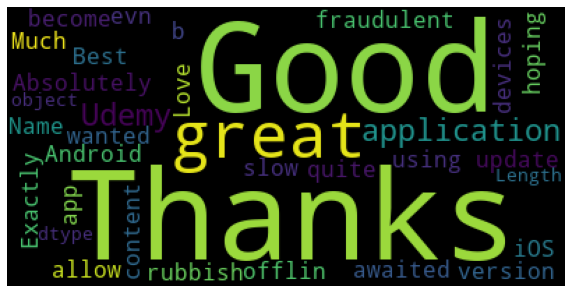

In [80]:
cloud=WordCloud(max_words=50,stopwords=stopwords.words('english')).generate(str(reviews_df['content']))
plt.figure(figsize=(10,10))
plt.axis('off')             #To remove grid lines
plt.imshow(cloud)

#  <div class="alert alert-success">Sentiment analysis using Textblob pretrained model</div>

#### <span style='color:purple'>TextBlob is a python library for processing text-based information. It gives a basic API to plunging into normal characteristic language preparing (NLP) tasks. Such as grammatical feature labelling, noun phrase extraction, sentiment analysis, classification, translation, and many more. </span>

In [81]:
from textblob import TextBlob
from nltk.corpus import stopwords
print("TextBlob imported sucessfully")

TextBlob imported sucessfully


In [82]:
# Before moving to main dataset few example for + review
text='food is excellent'
blob=TextBlob(text)
print(blob.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)


In [83]:
# Before moving to main dataset few example for + review
text1='food is horrible'
blob=TextBlob(text1)
print(blob.sentiment)

Sentiment(polarity=-1.0, subjectivity=1.0)


  <span style='color:Purple'>Polarity tells us how postive or negative the comment is 
value of polarity range is -1 to +1 
Postive value indicates sentement is not good
Negative value indicates sentement is  good  
    value of subjectivity relates  to whether it is   a public opinion or its a factual information(range is 0 to 1)</span>

In [84]:
df_textblob=reviews_df.head(50000)

In [85]:
df_textblob.shape

(50000, 4)

In [86]:
type(df_textblob)

pandas.core.frame.DataFrame

In [87]:
df_textblob.columns

Index(['Vader_sentiment_Score', 'ID', 'content', 'score'], dtype='object')

In [88]:
new_cols=['ID','content', 'score','Vader_sentiment_Score']            #Rearranging the column 
df_textblob=df_textblob.reindex(columns=new_cols)

In [89]:
df_textblob

,ID,content,score,Vader_sentiment_Score
0,1,Very Good,5,pos
1,2,Absolutely rubbish & fraudulent. I wanted to b...,1,neu
2,3,Good,5,pos
3,4,Best,5,pos
4,5,"After update app become slow, not evn allow to...",1,neu
...,...,...,...,...
49995,49996,Excellent,5,pos
49996,49997,High quality Courses,5,neu
49997,49998,"Informative, fun and great content. I feel a s...",5,neu
49998,49999,Best way of learning new skills.,5,neu


In [90]:
polarity_score=[]
for i  in range (0,df_textblob.shape[0]):
    score=TextBlob(df_textblob.iloc[i][1])
    score1=score.sentiment[0]
    polarity_score.append(score1)

In [91]:
df_textblob=pd.concat([df_textblob,pd.Series(polarity_score)],axis=1)

In [92]:
#TextBlob polarity_Score
df_textblob

,ID,content,score,Vader_sentiment_Score,0
0,1,Very Good,5,pos,0.910000
1,2,Absolutely rubbish & fraudulent. I wanted to b...,1,neu,0.165000
2,3,Good,5,pos,0.700000
3,4,Best,5,pos,1.000000
4,5,"After update app become slow, not evn allow to...",1,neu,-0.175000
...,...,...,...,...,...
49995,49996,Excellent,5,pos,1.000000
49996,49997,High quality Courses,5,neu,0.160000
49997,49998,"Informative, fun and great content. I feel a s...",5,neu,0.350000
49998,49999,Best way of learning new skills.,5,neu,0.568182


In [93]:
df_textblob.rename(columns={df_textblob.columns[4]  :"TextBlob_sentiment_Score"}, inplace = True)

In [94]:
reviews_df=df_textblob

In [95]:
reviews_df['TextBlob_sentiment_Score']= reviews_df['TextBlob_sentiment_Score'].round(decimals = 1) #Rounding off to the single df2

In [96]:
reviews_df.head()                  #merge with meta data

,ID,content,score,Vader_sentiment_Score,TextBlob_sentiment_Score
0,1,Very Good,5,pos,0.9
1,2,Absolutely rubbish & fraudulent. I wanted to b...,1,neu,0.2
2,3,Good,5,pos,0.7
3,4,Best,5,pos,1.0
4,5,"After update app become slow, not evn allow to...",1,neu,-0.2


In [97]:
# catagorizing textblob scores
def TextBlob_Cat(reviews_df):
    if reviews_df['TextBlob_sentiment_Score'] >= 0.5:  
        return ("pos")
    elif reviews_df['TextBlob_sentiment_Score'] <=-0.5:  
        return ("neg")   
    else:  
        return ("neu")
reviews_df['TextBlob_sentiment_Score'] = reviews_df.apply(TextBlob_Cat, axis=1)
reviews_df

,ID,content,score,Vader_sentiment_Score,TextBlob_sentiment_Score
0,1,Very Good,5,pos,pos
1,2,Absolutely rubbish & fraudulent. I wanted to b...,1,neu,neu
2,3,Good,5,pos,pos
3,4,Best,5,pos,pos
4,5,"After update app become slow, not evn allow to...",1,neu,neu
...,...,...,...,...,...
49995,49996,Excellent,5,pos,pos
49996,49997,High quality Courses,5,neu,neu
49997,49998,"Informative, fun and great content. I feel a s...",5,neu,neu
49998,49999,Best way of learning new skills.,5,neu,pos


# <div class="alert alert-success">Sentiment analysis using Flair pretrained model</div>


### <span style='color:Purple'> The flair sentiment classifer was originally trained on IMDB movie review data and not Hacker News comments. This difference may explain some of the limitations of this classifer but it also appears that the TextBlob libary captures other dimensions of “sentiment” that the flair NLP library just doesn’t have. </span>

In [98]:
#!pip3 install flair
import flair
from flair.models import TextClassifier
from flair.data import Sentence 
import pandas as pd

In [99]:
df_flair=reviews_df.head(50000)                  

In [100]:
df_flair.shape

(50000, 5)

In [101]:
df_flair=df_flair.head(500)

In [102]:
sia = TextClassifier.load('en-sentiment')

df_flair 

def Flair_sentiment_score(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):  
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"
  



2022-12-12 22:21:42,731 loading file C:\Users\Veerasuganthi\.flair\models\sentiment-en-mix-distillbert_4.pt


In [103]:
reviews_df['Flair_sentiment_score'] = reviews_df['content'].apply(lambda x: Flair_sentiment_score(x))

In [106]:
reviews_df

,ID,content,score,Vader_sentiment_Score,TextBlob_sentiment_Score,Flair_sentiment_score
0,1,Very Good,5,pos,pos,pos
1,2,Absolutely rubbish & fraudulent. I wanted to b...,1,neu,neu,neg
2,3,Good,5,pos,pos,pos
3,4,Best,5,pos,pos,pos
4,5,"After update app become slow, not evn allow to...",1,neu,neu,neg
...,...,...,...,...,...,...
49995,49996,Excellent,5,pos,pos,pos
49996,49997,High quality Courses,5,neu,neu,pos
49997,49998,"Informative, fun and great content. I feel a s...",5,neu,neu,pos
49998,49999,Best way of learning new skills.,5,neu,pos,pos


###  <span style='color:Purple'>Data Visualization on Udemy app review score </span>

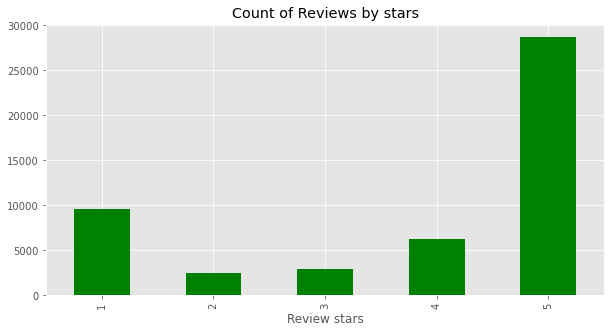

In [108]:
ax=reviews_df['score'].value_counts().sort_index().plot(kind='bar',color='green',title='Count of Reviews by stars',figsize=(10,5))
ax.set_xlabel('Review stars')              # Setting x label 
plt.show()

###  <span style='color:Purple'>Plot diagram  based on Vader_sentiment_Score </span>

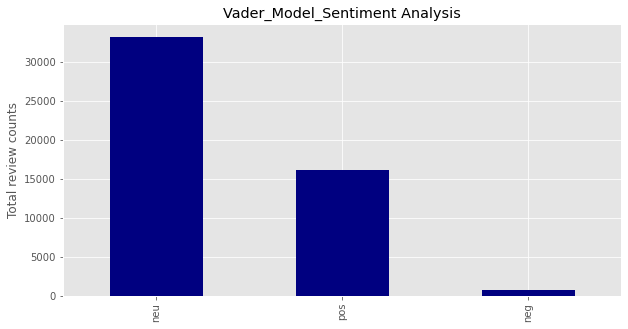

In [109]:
ax=reviews_df.Vader_sentiment_Score.value_counts().plot(kind='bar',color='navy',title="Vader_Model_Sentiment Analysis",figsize=(10,5))
ax.set_ylabel('Total review counts')              # Setting x label 
plt.show()

###  <span style='color:Purple'>Plot diagram  based on TextBlob_sentiment_Score </span> 

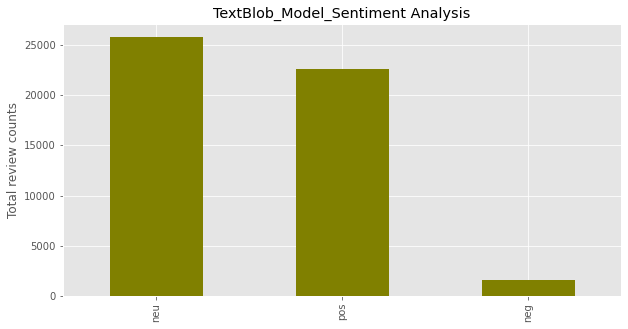

In [110]:
ay=reviews_df.TextBlob_sentiment_Score.value_counts().plot(kind='bar',color='Olive',title="TextBlob_Model_Sentiment Analysis",figsize=(10,5))
ay.set_ylabel('Total review counts')              # Setting x label 
plt.show()

###  <span style='color:Purple'>Plot diagram  based on Flair_sentiment_score </span> 

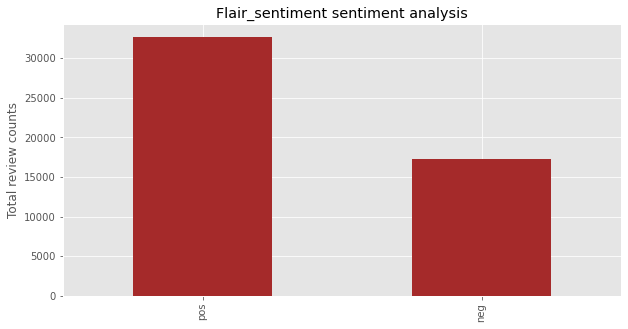

In [111]:
az=reviews_df.Flair_sentiment_score.value_counts().plot(kind='bar',color='brown',title="Flair_sentiment sentiment analysis",figsize=(10,5))
az.set_ylabel('Total review counts')              # Setting y label 
plt.show()

#  <div class="alert alert-success">VADER Model Vs TEXTBLOB Model Vs FLAIR MODEL</div>

In [112]:
reviews_df.head()

,ID,content,score,Vader_sentiment_Score,TextBlob_sentiment_Score,Flair_sentiment_score
0,1,Very Good,5,pos,pos,pos
1,2,Absolutely rubbish & fraudulent. I wanted to b...,1,neu,neu,neg
2,3,Good,5,pos,pos,pos
3,4,Best,5,pos,pos,pos
4,5,"After update app become slow, not evn allow to...",1,neu,neu,neg


In [115]:
Vader_Score=reviews_df['Vader_sentiment_Score'].value_counts()

In [116]:
TextBlob_score=reviews_df['TextBlob_sentiment_Score'].value_counts()

In [117]:
Flair_Score=reviews_df['Flair_sentiment_score'].value_counts()

In [118]:
Vader_Score

neu    33196
pos    16089
neg      715
Name: Vader_sentiment_Score, dtype: int64

In [119]:
reviews_df

,ID,content,score,Vader_sentiment_Score,TextBlob_sentiment_Score,Flair_sentiment_score
0,1,Very Good,5,pos,pos,pos
1,2,Absolutely rubbish & fraudulent. I wanted to b...,1,neu,neu,neg
2,3,Good,5,pos,pos,pos
3,4,Best,5,pos,pos,pos
4,5,"After update app become slow, not evn allow to...",1,neu,neu,neg
...,...,...,...,...,...,...
49995,49996,Excellent,5,pos,pos,pos
49996,49997,High quality Courses,5,neu,neu,pos
49997,49998,"Informative, fun and great content. I feel a s...",5,neu,neu,pos
49998,49999,Best way of learning new skills.,5,neu,pos,pos


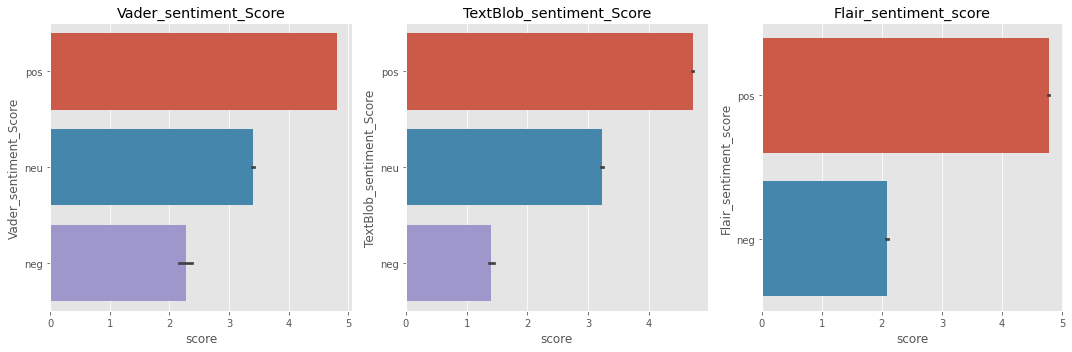

In [120]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=reviews_df,x='score',y='Vader_sentiment_Score',ax=axs[0])
sns.barplot(data=reviews_df,x='score',y='TextBlob_sentiment_Score',ax=axs[1])
sns.barplot(data=reviews_df,x='score',y='Flair_sentiment_score',ax=axs[2])
axs[0].set_title('Vader_sentiment_Score')
axs[1].set_title('TextBlob_sentiment_Score')
axs[2].set_title('Flair_sentiment_score')
plt.tight_layout()
plt.show()

# <div class="alert alert-info">Sentiment Analysis without TextBlob, VADER, and Flair machine Learning model</div> 

In [121]:
# Install vaderSentiment package for VADER
!pip install vaderSentiment
# Install flair
! pip install flair

In [122]:
# Data processing
import pandas as pd
import numpy as np

# Import TextBlob
from textblob import TextBlob

# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import flair pre-trained sentiment model
from flair.models import TextClassifier
classifier = TextClassifier.load('en-sentiment')

# Import flair Sentence to process input text
from flair.data import Sentence

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

# Set a wider colwith
pd.set_option('display.max_colwidth', 1000)

2022-12-12 23:25:07,375 loading file C:\Users\Veerasuganthi\.flair\models\sentiment-en-mix-distillbert_4.pt


In [123]:
reviews_df1=reviews_df1.head(50000)

In [124]:
reviews_df1.columns

Index(['content', 'score', 'ID'], dtype='object')

In [125]:
# Check the label distribution
reviews_df1['score'].value_counts()

5    28729
1     9542
4     6278
3     2915
2     2536
Name: score, dtype: int64

# TEXTBLOB For Sentiment Analysis

#### we will apply TEXTBLOB to the Udemy online course review dataset and see how it performs.

We first get the sentiment compound score for each review and save the values into a column called 'scores_VADER'. Then check if the compound score is positive. If the score is greater than or equal to zero, the predicted sentiment for the review is positive (labeled as 1). Otherwise, the predicted sentiment for the review is negative (labeled as 0).

In [126]:
# Get sentiment score for each review
reviews_df1['scores_TextBlob'] = reviews_df1['content'].apply(lambda s: TextBlob(s).sentiment.polarity)

# Predict sentiment label for each review
reviews_df1['pred_TextBlob'] = reviews_df1['scores_TextBlob'].apply(lambda x: 1 if x >=0 else 0)
reviews_df1.head(40)

,content,score,ID,scores_TextBlob,pred_TextBlob
0,Very Good,5,1,0.910000,1
1,"Absolutely rubbish & fraudulent. I wanted to buy a course through the app. I did that and the payment was also successful. I did receive an email confirmation. Soon after that when I checked, I could find the course under My learning. I switched between the options to check out for other courses and then came back to My learning where the course was not there anymore. I sent multiple emails to the udemy mail id but no response at all. Also, there is no contact no. seen anywhere on their site.",1,2,0.165000,1
2,Good,5,3,0.700000,1
3,Best,5,4,1.000000,1
4,"After update app become slow, not evn allow to login and after long time if you login then course video not playing.",1,5,-0.175000,0
5,1-Not downloading video... 2-Crash app repeatedly 3-downloaded video buffering,1,6,0.000000,1
6,Okk,5,7,0.000000,1
7,Amazing,5,8,0.600000,1
8,"So incredibly irritating. This app is just so painful to use. The video player is a joke, the constant popups asking for attention are irritating at best. It eats your battery. The UX constantly catches you out by skipping to the previous video, losing your place. If I hadn't bought this course by Peter Baker I would be using something free on YouTube instead. The course is great, but I'll never buy anything through this app again. BTW: No, I won't be opening a support ticket. That's your job.",1,9,0.059259,1
9,Payments issues are never ending. I made the payment and the transactions details shows that I credited to receipent account . But in udmey it is showing payment pending ?? This is the second time I'm facing this issue. Is it always like this????? Do they need some months or years to verify the payment ?????????? Pls guys improve the things ....,1,10,0.000000,1


In [127]:
# Predict sentiment label for each review
reviews_df1['label'] = reviews_df1['score'].apply(lambda x: 1 if x >=3 else 0)
reviews_df1.head()

,content,score,ID,scores_TextBlob,pred_TextBlob,label
0,Very Good,5,1,0.910,1,1
1,"Absolutely rubbish & fraudulent. I wanted to buy a course through the app. I did that and the payment was also successful. I did receive an email confirmation. Soon after that when I checked, I could find the course under My learning. I switched between the options to check out for other courses and then came back to My learning where the course was not there anymore. I sent multiple emails to the udemy mail id but no response at all. Also, there is no contact no. seen anywhere on their site.",1,2,0.165,1,0
2,Good,5,3,0.700,1,1
3,Best,5,4,1.000,1,1
4,"After update app become slow, not evn allow to login and after long time if you login then course video not playing.",1,5,-0.175,0,0


#### After getting predictions from TextBlob, let's check the prediction accuracy. 

In [128]:
# Compare Actual and Predicted
accuracy_score(reviews_df1['label'],reviews_df1['pred_TextBlob'])

0.83156

#### Comparing the actual label with the TextBlob prediction, we get an accuracy score of 0.83214, which means that TextBlob predicted the review sentiment 83.2% of the time. 

# VADER For Sentiment Analysis

#### we will apply VADER to the Udemy on line course review dataset and see how it performs.

We first get the sentiment compound score for each review and save the values into a column called 'scores_VADER'. Then check if the compound score is positive. If the score is greater than or equal to zero, the predicted sentiment for the review is positive (labeled as 1). Otherwise, the predicted sentiment for the review is negative (labeled as 0).

In [129]:
# Get sentiment score for each review
vader_sentiment = SentimentIntensityAnalyzer()
reviews_df1['scores_VADER'] = reviews_df1['content'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound'])

# Predict sentiment label for each review
reviews_df1['pred_VADER'] = reviews_df1['scores_VADER'].apply(lambda x: 1 if x >=0 else 0)
reviews_df1.head()

,content,score,ID,scores_TextBlob,pred_TextBlob,label,scores_VADER,pred_VADER
0,Very Good,5,1,0.910,1,1,0.4927,1
1,"Absolutely rubbish & fraudulent. I wanted to buy a course through the app. I did that and the payment was also successful. I did receive an email confirmation. Soon after that when I checked, I could find the course under My learning. I switched between the options to check out for other courses and then came back to My learning where the course was not there anymore. I sent multiple emails to the udemy mail id but no response at all. Also, there is no contact no. seen anywhere on their site.",1,2,0.165,1,0,-0.6632,0
2,Good,5,3,0.700,1,1,0.4404,1
3,Best,5,4,1.000,1,1,0.6369,1
4,"After update app become slow, not evn allow to login and after long time if you login then course video not playing.",1,5,-0.175,0,0,-0.3089,0


#### After getting predictions from VADER, let's check the prediction accuracy

In [130]:
# Compare Actual and Predicted
accuracy_score(reviews_df1['label'],reviews_df1['pred_VADER'])

0.8415

#### Comparing the actual label with the VADER prediction, we get an accuracy score of 0.84, which means that VADER predicted the review sentiment 84.1% of the time. 
TextBlob has a prediction accuracy of 83.2% for the same dataset, so VADER has an 1% improvement over the TextBlob prediction.

# Flair For Sentiment Analysis

In [131]:
# Define a function to get Flair sentiment prediction score
def score_flair(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    score = sentence.labels[0].score
    value = sentence.labels[0].value
    return score, value

In [132]:
# Get sentiment score for each review
reviews_df1['scores_flair'] = reviews_df1['content'].apply(lambda s: score_flair(s)[0])

# Predict sentiment label for each review
reviews_df1['pred_flair'] = reviews_df1['content'].apply(lambda s: score_flair(s)[1])

#### We can see that the summary statistics show that most flair scores are close to 1, which means that the flair sentiment model is overall very confident about the predictions.

In [133]:
# Check the distribution of the score
reviews_df1['scores_flair'].describe()

count    50000.000000
mean         0.971870
std          0.069966
min          0.500020
25%          0.982882
50%          0.994698
75%          0.999409
max          0.999999
Name: scores_flair, dtype: float64

#### The distribution of the labels is very balanced.

In [648]:
# Check the counts of labels
reviews_df1['pred_flair'].value_counts()

POSITIVE    32692
NEGATIVE    17308
Name: pred_flair, dtype: int64

In [649]:
# Check sample records
reviews_df1.head()

,content,score,ID,scores_TextBlob,pred_TextBlob,label,scores_VADER,pred_VADER,scores_flair,pred_flair
0,it's very useful app 👍🙂. you can learn everything.,5,1,0.390000,1,1,0.7096,1,0.989366,POSITIVE
1,"After the recent update, I noticed that when a lecture ends, the next lecture does not start automatically and also manually I am unable to play the next lecture and also selecting any random lecture from my course does not play the lecture. I am stuck in this crucial time. Please fix this defect asap.",2,2,-0.166667,0,0,-0.1867,0,0.999986,NEGATIVE
2,very helpful for the beginners,5,3,0.200000,1,1,0.4754,1,0.990698,POSITIVE
3,"Genuinely love it, thanks!",5,4,0.375000,1,1,0.8122,1,0.998615,POSITIVE
4,"Udemy has deleted all my courses and all my progress. Update, I found that I had change my account email to an email that I did not recall I have finally regained access Please make it possible to log into your account using the username in the future",5,5,0.000000,1,1,0.6249,1,0.999974,NEGATIVE


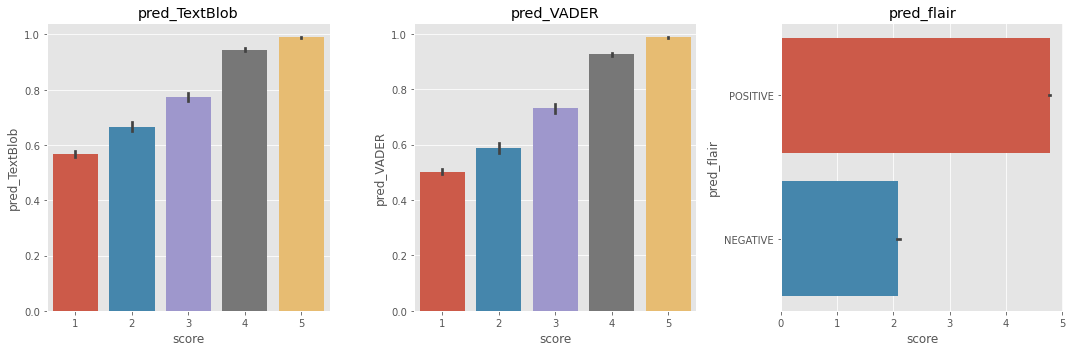

In [134]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=reviews_df1,x='score',y='pred_TextBlob',ax=axs[0])
sns.barplot(data=reviews_df1,x='score',y='pred_VADER',ax=axs[1])
sns.barplot(data=reviews_df1,x='score',y='pred_flair',ax=axs[2])
axs[0].set_title('pred_TextBlob')
axs[1].set_title('pred_VADER')
axs[2].set_title('pred_flair')
plt.tight_layout()
plt.show()

#### Before checking the prediction accuracy, we need to map the 'NEGATIVE' value to 0 and the 'POSITIVE' value to 1 because the Amazon review dataset has true labels of 0 and 1.

In [135]:
# Change the label of flair prediction to 0 if negative and 1 if positive
mapping = {'NEGATIVE': 0, 'POSITIVE': 1}
reviews_df1['pred_flair'] = reviews_df1['pred_flair'].map(mapping)

In [136]:
# Check counts
reviews_df1['pred_flair'].value_counts()

1    32665
0    17335
Name: pred_flair, dtype: int64

#### After comparing the flair prediction with the actual sentiment label, we can see that flair predicts the sentiment correctly 94.8% of the time! The prediction accuracy is an 18% increase from VADER and a 26% increase from TextBlob!



# <div class="alert alert-success">Conclusion</div>

##### In this above analysis we compared TextBlob vs. VADER vs. Flair for sentiment analysis.

* Methodology
 * VADER and TextBlob are lexicon and rule-based. 
 * Flair is model-based.
* Meaning of score
 * VADER and TextBlob have sentiment scores ranging from -1 to 1, where -1 means very negative, 1 means very positive, and 0 means neutral.
 * Flair has a score ranging from 0 to 1, where 0 means very unconfident about the prediction and 1 means very confident about the prediction. 
* Speed Performance
 * Flair is slower than TextBlob and VADER because the computation algorithm is more complicated.
* Accuracy Performance
 * Based on the results of this project, flair has the best prediction accuracy, VADER is the second-best, and TextBlob is the third.